In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [501]:
df=pd.read_csv(r"C:\Users\Public\ML\Electricity Consumption\Electric_Production.csv")
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [502]:
df.shape

(397, 2)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [504]:
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [505]:
df.tail(75)

,DATE,Value
322,11-01-2011,93.8095
323,12-01-2011,107.3312
324,01-01-2012,111.9646
325,02-01-2012,103.3679
326,03-01-2012,93.5772
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [506]:
train_df=df.iloc[:324]
train_df.tail()

,DATE,Value
319,08-01-2011,113.5958
320,09-01-2011,99.4712
321,10-01-2011,90.3566
322,11-01-2011,93.8095
323,12-01-2011,107.3312


In [507]:
test_df=df.iloc[324:]
test_df=test_df.set_index("DATE")
test_df.index = pd.to_datetime(test_df.index)
test_df.head()

,Value
DATE,
2012-01-01,111.9646
2012-02-01,103.3679
2012-03-01,93.5772
2012-04-01,87.5566
2012-05-01,92.7603


In [508]:
test_df.shape

(73, 1)

In [509]:
###create pipeline for data

In [510]:
train_df["Month"] = pd.to_datetime(train_df["DATE"]).dt.month
train_df["Year"] = pd.to_datetime(train_df["DATE"]).dt.year
train_df["Week"] = pd.to_datetime(train_df["DATE"]).dt.isocalendar().week
train_df["Day"] = pd.to_datetime(train_df["DATE"]).dt.day_name()
train_df['Value'] = train_df.pop('Value')
train_df=train_df.set_index("DATE")
train_df.index = pd.to_datetime(train_df.index)
train_df.head()

C:\Users\rajesh.gadhave\Siemense\DeepLearning\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Month,Year,Week,Day,Value
DATE,,,,,
1985-01-01,1,1985,1,Tuesday,72.5052
1985-02-01,2,1985,5,Friday,70.6720
1985-03-01,3,1985,9,Friday,62.4502
1985-04-01,4,1985,14,Monday,57.4714
1985-05-01,5,1985,18,Wednesday,55.3151


In [511]:
eda_df=train_df

<AxesSubplot:title={'center':'Energy consumptionn Date-wise'}, xlabel='DATE', ylabel='Value'>

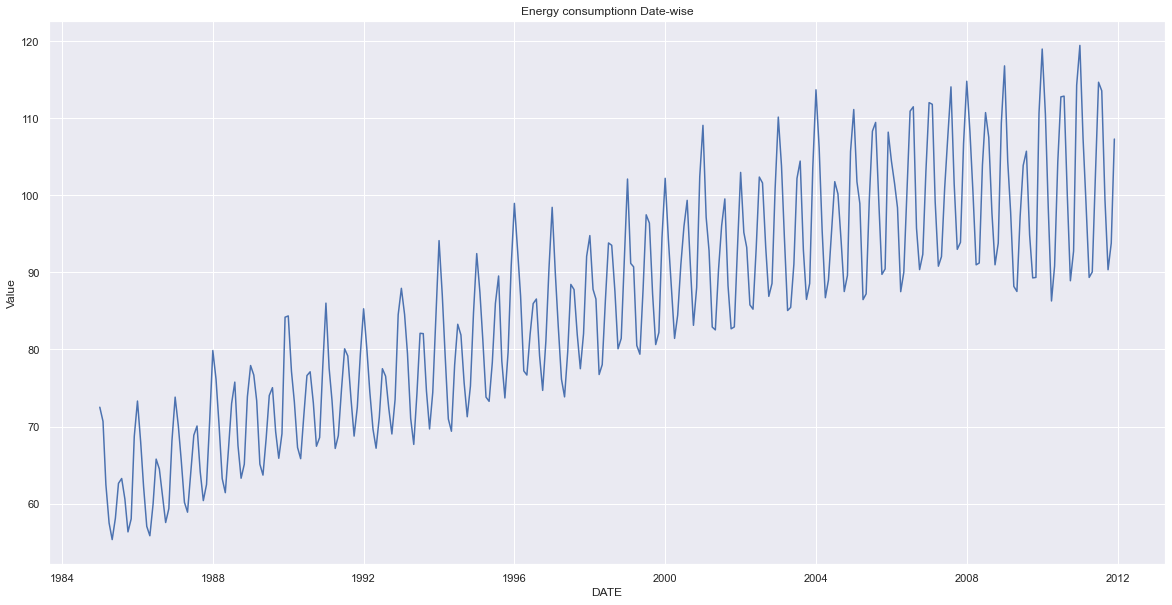

In [512]:
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Energy consumptionn Date-wise")
sns.lineplot(x = 'DATE', y = 'Value', 
              data = eda_df)

Text(0, 0.5, 'Usage')

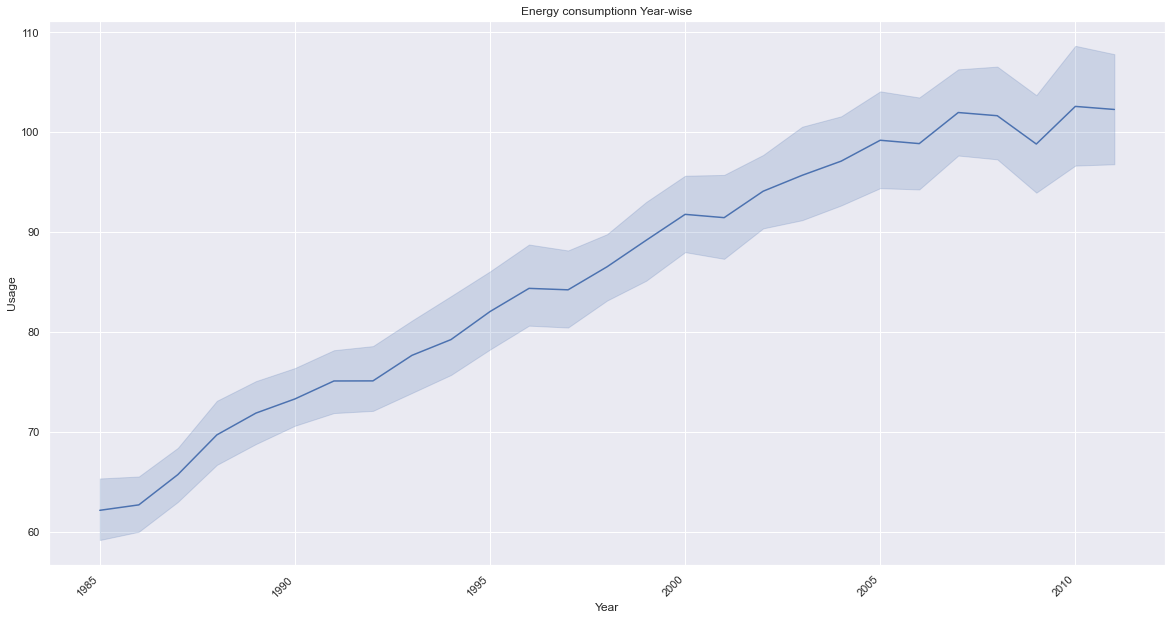

In [513]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='Year', y='Value', data=eda_df)
plt.title("Energy consumptionn Year-wise")
plt.xlabel("Year")
plt.xticks(rotation=45,ha = 'right')
plt.ylabel("Usage")

Text(0, 0.5, 'Usage')

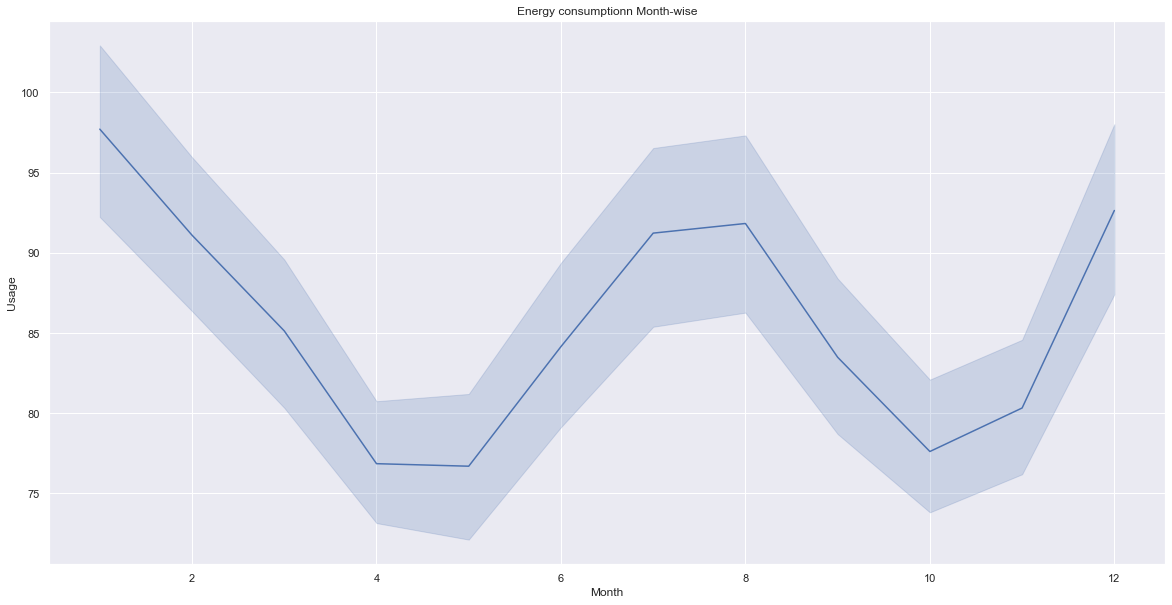

In [514]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='Month', y='Value', data=eda_df)
plt.title("Energy consumptionn Month-wise")
plt.xlabel("Month")
plt.ylabel("Usage")

Text(0.5, 1.0, 'Energy Distribution Chart')

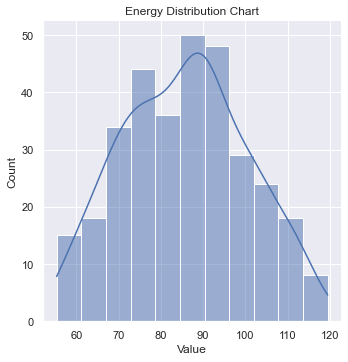

In [515]:
sns.displot(eda_df["Value"],kde=True)
plt.title("Energy Distribution Chart")

In [516]:
train_df.head()

,Month,Year,Week,Day,Value
DATE,,,,,
1985-01-01,1,1985,1,Tuesday,72.5052
1985-02-01,2,1985,5,Friday,70.6720
1985-03-01,3,1985,9,Friday,62.4502
1985-04-01,4,1985,14,Monday,57.4714
1985-05-01,5,1985,18,Wednesday,55.3151


In [517]:
from sklearn.preprocessing import MinMaxScaler
Train=train_df.iloc[:,-1:]
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Train)

In [518]:
def create_ts_data(values, no_of_features):
    X = []
    y = []
    for i in range(len(values)):
        # find the ending index for the values array
        end_ix = i + no_of_features
        if end_ix > len(values)-1:
            break
        # fetch X and y values
        seq_x, seq_y = values[i:end_ix], values[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [519]:
features = 12
X_train, y_train = create_ts_data(Train, features)

In [520]:
X_train.shape

(312, 12, 1)

In [521]:
y_train.shape

(312, 1)

In [522]:
#importing libraries for Deep Learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [523]:
####Developing LSTM Model for prediction

In [524]:
model1 = Sequential()

# Adding a 3 LSTM layers and Dropouts for regularisation
model1.add(LSTM(units = 50, activation='relu',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, activation='relu',return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, activation='relu', return_sequences = True))
model1.add(Dropout(0.2))

# Adding output layer
model1.add(Dense(units = 1))

# Compiling model1
model1.compile(optimizer = 'adam', loss = 'mse')

In [525]:
model1.fit(X_train, y_train, epochs = 300)

Epoch 1/300
10/10 [==============================] - 6s 35ms/step - loss: 0.2484
Epoch 2/300
10/10 [==============================] - 0s 35ms/step - loss: 0.1456
Epoch 3/300
10/10 [==============================] - 0s 35ms/step - loss: 0.1071
Epoch 4/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0930
Epoch 5/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0828
Epoch 6/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0760
Epoch 7/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0678
Epoch 8/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0581
Epoch 9/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0505
Epoch 10/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0450
Epoch 11/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0418
Epoch 12/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0390
Epoch 13/300
10/10 [=====

In [526]:
df=df.set_index("DATE")
df.index = pd.to_datetime(df.index)

In [527]:
validate_df = df[len(df) - len(test_df) - 12:].values
validate_df.shape

(85, 1)

In [528]:
train_df.iloc[-12:]

,Month,Year,Week,Day,Value
DATE,,,,,
2011-01-01,1,2011,52,Saturday,119.4880
2011-02-01,2,2011,5,Tuesday,107.3753
2011-03-01,3,2011,9,Tuesday,99.1028
2011-04-01,4,2011,13,Friday,89.3583
2011-05-01,5,2011,17,Sunday,90.0698
2011-06-01,6,2011,22,Wednesday,102.8204
2011-07-01,7,2011,26,Friday,114.7068
2011-08-01,8,2011,31,Monday,113.5958
2011-09-01,9,2011,35,Thursday,99.4712


In [529]:
input_val = sc.transform(validate_df)

In [530]:
validate_df.shape

(85, 1)

In [531]:
test_df.shape

(73, 1)

In [532]:
features

12

In [533]:
X_test_data = []
for i in range(len(input_val)):
    # find the ending index for the values array
    end_ix = i + features
    if end_ix > len(input_val)-1:
        break
    # fetch X and y values
    seq_x = input_val[i:end_ix]
    X_test_data.append(seq_x)

In [534]:
X_test=np.array(X_test_data)

In [535]:
# Reshape before Passing to model1 for prediction
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [536]:
# Pass to Model 
y_pred = model1.predict(X_test)

y_pred.shape

(73, 12, 1)

In [537]:
predictedValue  = [x[0] for x in y_pred]
predictedValue = sc.inverse_transform(predictedValue)

In [538]:
actualValue = test_df['Value'].to_list()
predictedValue=list(predictedValue.flatten())
dates = test_df.index.to_list()

In [539]:
Output = pd.DataFrame(data={
    "Date":dates,
    "actualValue": actualValue,
    "predictedValue": predictedValue
})

In [540]:
Output=Output.set_index("Date")

<AxesSubplot:title={'center':'Actual vs Predicted Energy consumptionn Date-wise'}, xlabel='Date', ylabel='Values'>

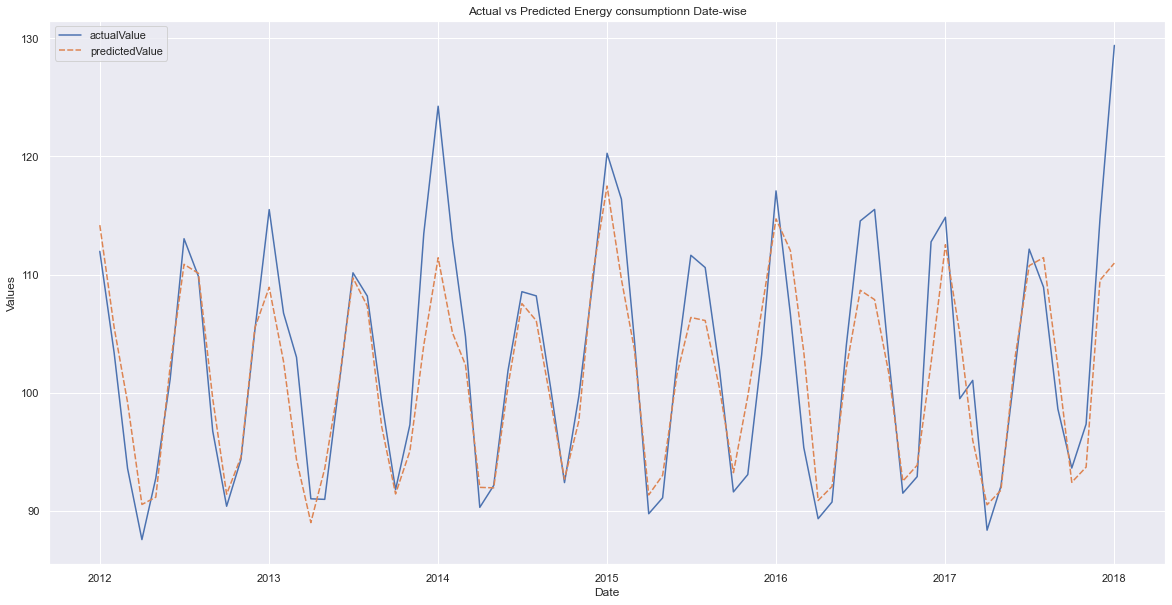

In [541]:
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Actual vs Predicted Energy consumptionn Date-wise")
plt.ylabel("Values")
sns.lineplot(data = Output)

In [542]:
####Developing CNN Model for prediction

In [543]:
#importing CNN libraries
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [544]:
model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model2.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model2
model2.fit(X_train, y_train, epochs=300)

Epoch 1/300
10/10 [==============================] - 1s 8ms/step - loss: 0.0901
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0271
Epoch 3/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 8/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 9/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 10/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 11/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 12/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 13/300
10/10 [=================

In [545]:
validate_df = df[len(df) - len(test_df) - 12:].values
validate_df.shape

(85, 1)

In [546]:
input_val = sc.transform(validate_df)

In [547]:
X_test_data = []
for i in range(len(input_val)):
    # find the ending index for the values array
    end_ix = i + features
    if end_ix > len(input_val)-1:
        break
    # fetch X and y values
    seq_x = input_val[i:end_ix]
    X_test_data.append(seq_x)

In [548]:
X_test=np.array(X_test_data)

In [549]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [550]:
y_pred = model2.predict(X_test)

In [551]:
y_pred.shape

(73, 1)

In [552]:
predictedValue = sc.inverse_transform(y_pred)

In [553]:
actualValue = test_df['Value'].to_list()
predictedValue=list(predictedValue.flatten())
dates = test_df.index.to_list()

In [554]:
Output2 = pd.DataFrame(data={
    "Date":dates,
    "actualValue": actualValue,
    "predictedValue": predictedValue
})

In [555]:
Output2=Output2.set_index("Date")

<AxesSubplot:title={'center':'Actual vs Predicted Energy consumptionn Date-wise'}, xlabel='Date', ylabel='Values'>

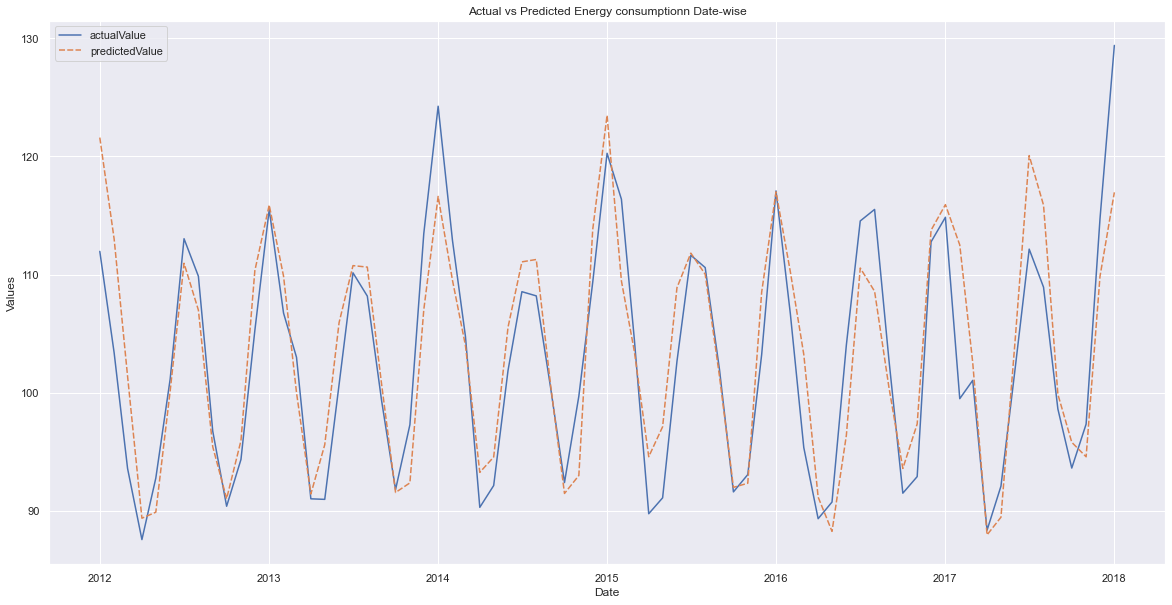

In [556]:
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Actual vs Predicted Energy consumptionn Date-wise")
plt.ylabel("Values")
sns.lineplot(data = Output2)

In [557]:
## Comparing LSTM and CNN model

In [558]:
history1 = model1.fit(X_train, y_train, epochs = 300)

Epoch 1/300
10/10 [==============================] - 0s 33ms/step - loss: 0.0036
Epoch 2/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0037
Epoch 3/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0037
Epoch 4/300
10/10 [==============================] - 0s 37ms/step - loss: 0.0037
Epoch 5/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0037
Epoch 6/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0038
Epoch 7/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0038
Epoch 8/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0037
Epoch 9/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0037
Epoch 10/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0039
Epoch 11/300
10/10 [==============================] - 0s 34ms/step - loss: 0.0039
Epoch 12/300
10/10 [==============================] - 0s 35ms/step - loss: 0.0038
Epoch 13/300
10/10 [=====

In [559]:
history2=model2.fit(X_train, y_train, epochs = 300)

Epoch 1/300
10/10 [==============================] - 0s 8ms/step - loss: 6.9812e-04
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 9.2008e-04
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 8.5264e-04
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 8.0578e-04
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 7.6139e-04
Epoch 7/300
10/10 [==============================] - 0s 8ms/step - loss: 7.9302e-04
Epoch 8/300
10/10 [==============================] - 0s 7ms/step - loss: 6.6838e-04
Epoch 9/300
10/10 [==============================] - 0s 7ms/step - loss: 6.4206e-04
Epoch 10/300
10/10 [==============================] - 0s 7ms/step - loss: 6.6247e-04
Epoch 11/300
10/10 [==============================] - 0s 7ms/step - loss: 8.4301e-04
Epoch 12/300
10/10 [==============================] - 0s 8ms/step - loss: 8.90

In [560]:
model1=history1.history['loss']
model2=history2.history['loss']

In [561]:
Comparison = pd.DataFrame(data={
    "Epoc":np.arange(1,301,1),
    "model1": model1,
    "model2": model2
})

In [562]:
Comparison=Comparison.set_index("Epoc")

<AxesSubplot:title={'center':'Model1 vs Model2 Comparison'}, xlabel='Epoc'>

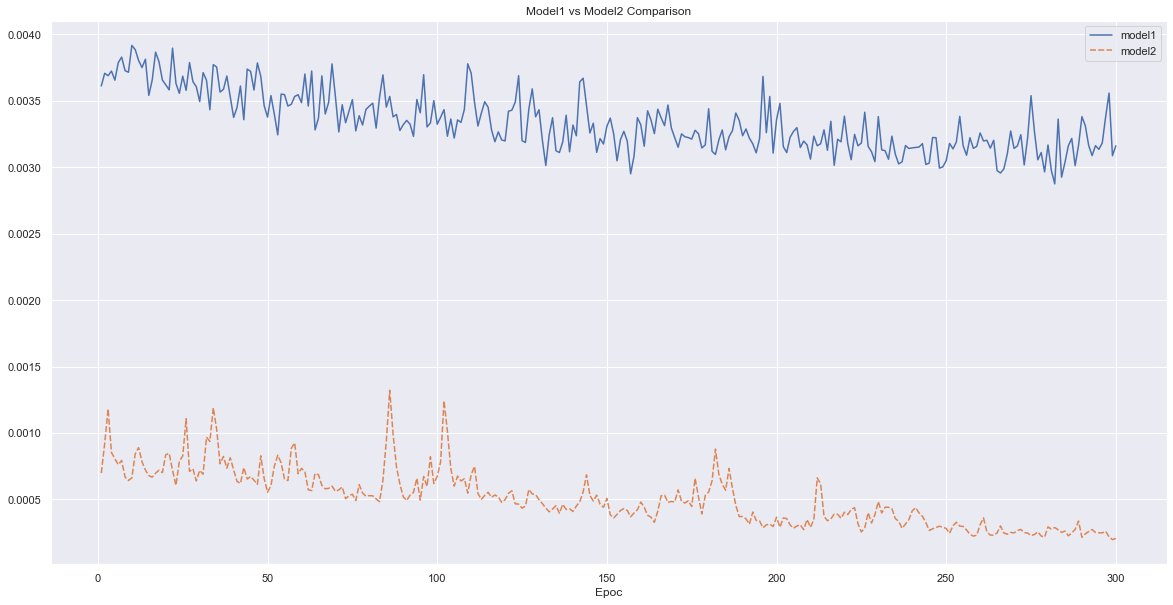

In [563]:
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Model1 vs Model2 Comparison")
sns.lineplot(data = Comparison)